<a href="https://colab.research.google.com/github/lauramoraes/Analise_de_Clusters/blob/master/9%20-%20Clusteriza%C3%A7%C3%A3o%20por%20K-Means%20(Wine).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Datasets

### Importando bibliotecas a serem usadas

In [0]:
suppressMessages(suppressWarnings(library(tidyverse)))

### Carregando os dados salvos anteriormente

In [12]:
load("data_cleaned.Rdata")
load("data_names.Rdata")
head(data_cleaned)

Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450


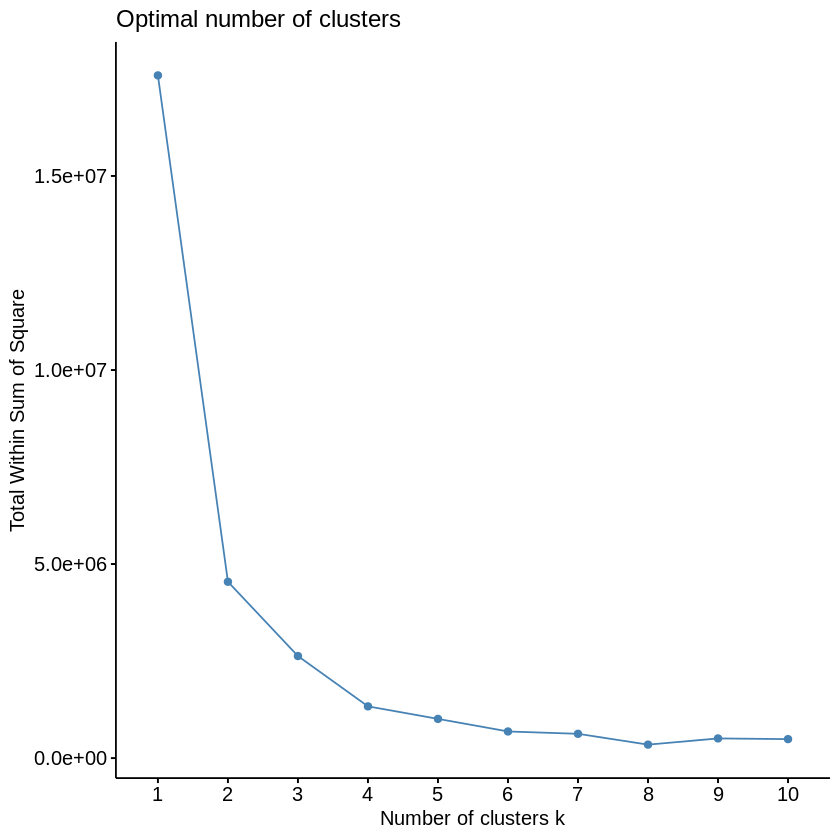

In [14]:
library(factoextra)
fviz_nbclust(data_cleaned, kmeans, method = "wss") 

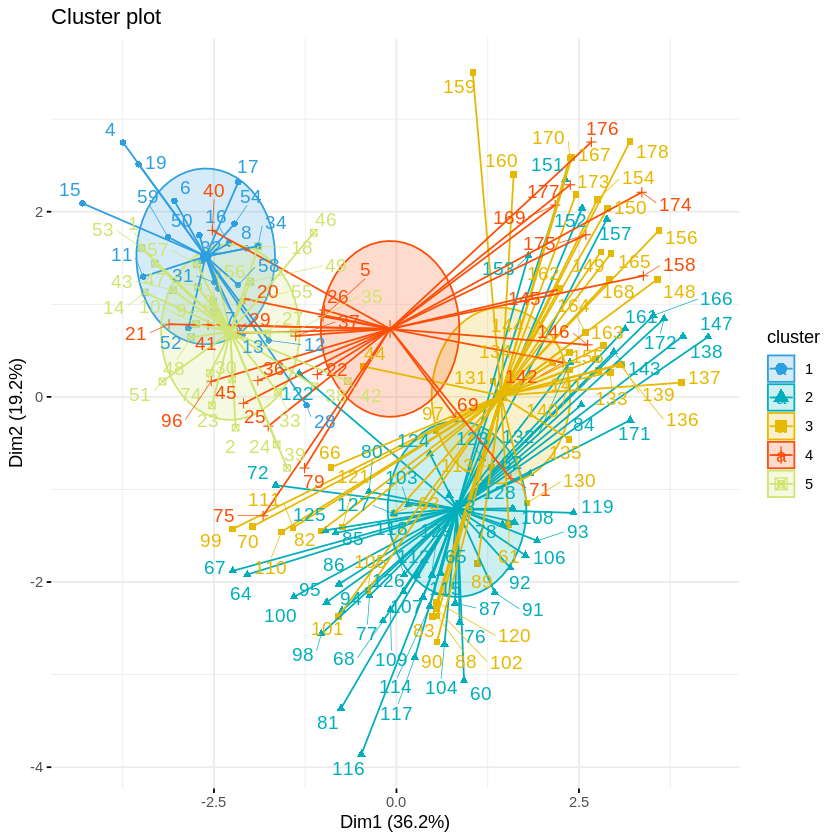

In [16]:
set.seed(123)
km.res <- kmeans(data_cleaned, centers=5, iter.max = 100, nstart=100)

fviz_cluster(km.res, 
             data = data_cleaned,
             palette = c("#2E9FDF", "#00AFBB", "#E7B800", "#FC4E07", "#CFE470"), 
             ellipse.type = "euclid", 
             star.plot = TRUE, 
             repel = TRUE, 
             ggtheme = theme_minimal()
)


In [38]:
pca <- prcomp(data_cleaned, scale=TRUE, center=TRUE)
data_reduced <- pca$x[,1:6]
data_reduced

PC1,PC2,PC3,PC4,PC5,PC6
-3.3074210,1.43940225,-0.16527283,0.21502463,0.6910933491,0.22325037
-2.2032498,-0.33245507,-2.02075706,0.29053874,-0.2569298662,0.92451231
-2.5096607,1.02825072,0.98005406,-0.72286320,-0.2503269758,-0.54773096
-3.7464972,2.74861839,-0.17569622,-0.56638560,-0.3109643979,-0.11410911
-1.0060705,0.86738404,2.02098726,0.40861314,0.2976179585,0.40537608
-3.0416737,2.11643092,-0.62762537,0.51418703,-0.6302408998,-0.12308335
-2.4422005,1.17154534,-0.97434638,0.06564533,-1.0248708712,0.61837638
-2.0536438,1.60443714,0.14587040,1.18925327,0.0766871685,1.43575612
-2.5038113,0.91548847,-1.76598739,-0.05611208,-0.8897471068,0.12881767
-2.7458824,0.78721703,-0.98147886,-0.34839878,-0.4672350615,-0.16293204


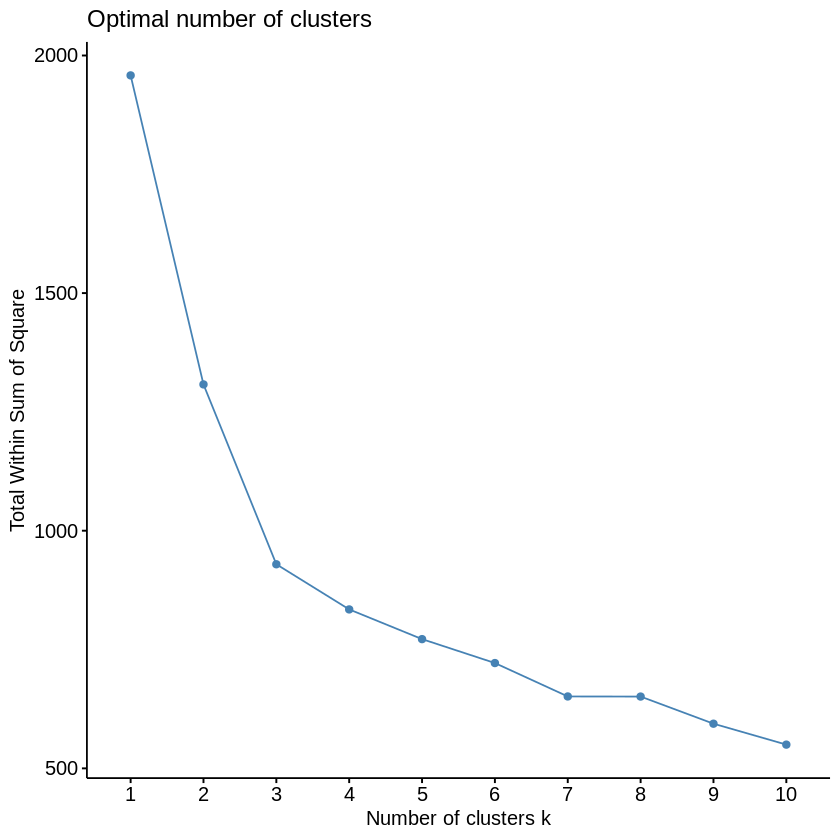

In [39]:
library(factoextra)
fviz_nbclust(data_reduced, kmeans, method = "wss") 

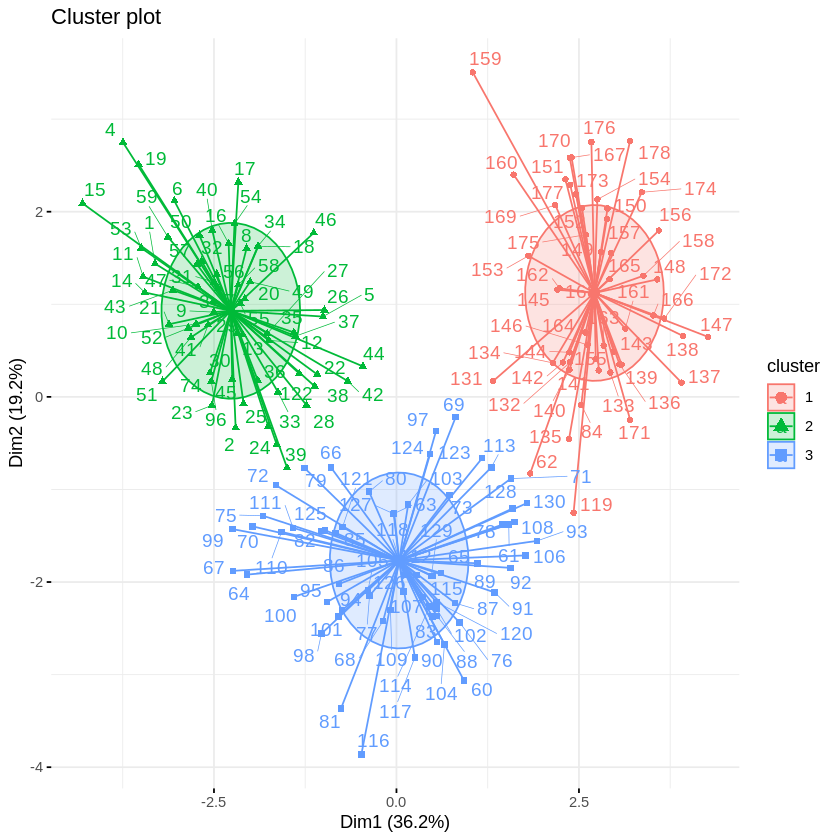

In [46]:
set.seed(123)
km.res <- kmeans(data_reduced, centers=3, iter.max = 100, nstart=100)

fviz_cluster(km.res, 
             data = data_cleaned,
#              palette = c("#2E9FDF", "#00AFBB", "#E7B800", "#FC4E07", "#CFE470"), 
             ellipse.type = "euclid", 
             star.plot = TRUE, 
             repel = TRUE, 
             ggtheme = theme_minimal()
)

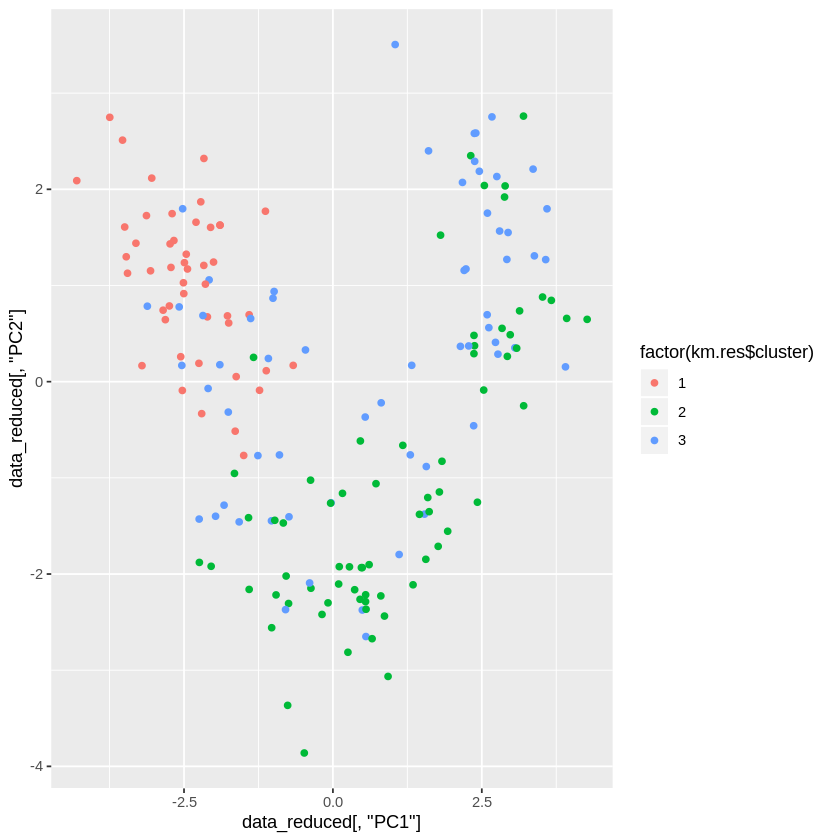

In [54]:
km.res <- kmeans(data_cleaned, centers=3, iter.max = 100, nstart=100)

ggplot() +
  geom_point(aes(x=data_reduced[, 'PC1'], y=data_reduced[, 'PC2'], color=factor(km.res$cluster)))# + 
#   geom_point(aes(x=km.res$centers[, 1], y=km.res$centers[, 2]), color="black", size=5, shape=4, stroke=2) #+
#   scale_color_discrete(name = "Clusters")

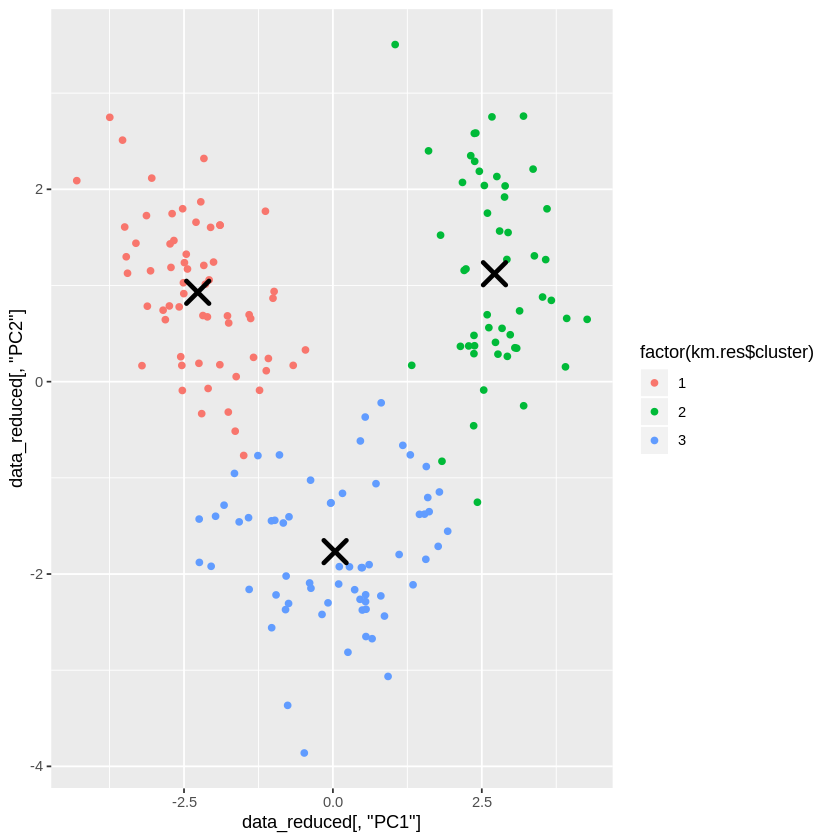

In [51]:
km.res <- kmeans(data_reduced, centers=3, iter.max = 100, nstart=100)

ggplot() +
  geom_point(aes(x=data_reduced[, 'PC1'], y=data_reduced[, 'PC2'], color=factor(km.res$cluster))) + 
  geom_point(aes(x=km.res$centers[, 1], y=km.res$centers[, 2]), color="black", size=5, shape=4, stroke=2) #+
#   scale_color_discrete(name = "Clusters")